# iPython explanatory notebook 
## Final project 02805 Social Data Analysis 2019

Introduction?

Link to Observable Notebook: https://observablehq.com/d/9b3fa89d8b0f71bf

### Notebook content:
* [Motivation](#Motivation)    
    * [Dataset](#1a)
    * [Why this data](#1b)
    * [User experience](#1c)
    
    
* [Basic statistics](#Stats)
    * [Preprocessing](#2a)
    * [Key points](#2b)
    
    
* [Data Analysis](#3)
    * [Dataset analysis](#3a)
    * [Machine Learning](#3b)
    
    
* [Genre](#4)
    * [Visual Narrative](#4a)
    * [Narrative Structur](#4b)
    
    
* [Visualizations](#5)
    * [Choice of visualization](#5a)
    * [Story telling](#5b)
    
    
* [Discussion](#6)
    * [What went well?](#6a)
    * [What is missing?](#6b)
    
    
* [Contributions](#7)


* [References](#8)

## Import packages:

In [1]:
# Import packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; 
%matplotlib inline
import folium  
from folium import plugins
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.corpus import stopwords
import re
from IPython.core.display import HTML
from scipy.misc import imread
from datetime import datetime
import time

# 1. Motivation <a id="Motivation"></a>

## 1.a What is your dataset? <a id="1a"></a>

Our dataset is a gathering of two datasets from different sources that contain tweets from Donald Trump official twitter account as well as tweets from people that reacted to Trump’s actions and whereabouts.

**Data source**: We used two datasets; one containing people’s tweets mentioning ‘Trump’ (https://data.world/s0nas/donal-trump-tweets-sentiment) (355.31 MB)  and the other one contains tweets from Trump’s personal account and official account managed by his staff from first 100 days after the he was elected (https://data.world/sbjun/trumps-post-inaug-tweets) (134.5 KB).  

There are about 1.8 millions tweets in the first dataset which are from the period of february fifth 2017 to february fifteen 2017. The second dataset contains a total of 477 tweets from which 70 are from the same period as the tweets in the first dataset.

**Features/Attributes**: The first dataset is a file with 9 columns containing creating datetime of tweet, the users name of the tweet, the tweet text, the timezone of the twitter users, the location of the tweet, geo latitude, geo longitude, the geo location of the tweets and the sentiment ratings. The second dataset contains a file with 6 columns such as the ID of tweet, Timestamp (EST), the text of the tweet, number of favorites, number of retweets and the device source of the tweet. 

### Tweets from Donald Trumps personal Account

Here we load the data with Tweets from Trumps own account and generate new the columns Date/Time/Hour from the Timestamp. 

In [2]:
##### Load data: ######
# This data is from: https://data.world/sbjun/trumps-post-inaug-tweets

# Read the data:
df_Trump = pd.read_csv("tweets_from_Trump.csv"
                   ,sep=',',encoding = "ISO-8859-1") #,usecols=fields)

N = len(df_Trump.index)

# Parse columns as data and time:
df_Trump['Date'] = pd.to_datetime(df_Trump.timestamp).dt.date
df_Trump['Time'] = pd.to_datetime(df_Trump.timestamp).dt.time
df_Trump['Hour'] = pd.to_datetime(df_Trump.timestamp).dt.hour
df_Trump.head()

,id,tweet,timestamp,of_favorites,of_retweets,source,Date,Time,Hour
0,858375278686613504,Mainstream (FAKE) media refuses to state our l...,Sat Apr 29 2017 13:39:48,79996,19931,iPhone,2017-04-29,13:39:48,13
1,858343980823703552,Looking forward to RALLY in the Great State of...,Sat Apr 29 2017 11:35:26,59360,10295,iPhone,2017-04-29,11:35:26,11
2,858148882756325376,".@LouDobbs just stated that ""President Trump's...",Fri Apr 28 2017 22:40:11,72907,15035,iPhone,2017-04-28,22:40:11,22
3,858100088253669376,North Korea disrespected the wishes of China &...,Fri Apr 28 2017 19:26:18,85638,23588,iPhone,2017-04-28,19:26:18,19
4,858086278037950464,I will be interviewed by @MarthaMaccallum on @...,Fri Apr 28 2017 18:31:25,35096,5242,iPhone,2017-04-28,18:31:25,18


### Tweets from other user incuding sentiment rating

Here we load the data with Tweets about Trump. We also create two new columns, one corresponding to the day and another one reflecting the positivity or the negativity of the sentiment rate (-1 if the sentiment rate is negative, 0 if it is neutral and 1 if it is positive)

In [3]:
##### Load data: ######
# This data is from: https://data.world/s0nas/donal-trump-tweets-sentiment

# Read the data:
df_sentiment = pd.read_csv("Trump_tweets_sentiment.csv"
                   ,sep=',',encoding = "ISO-8859-1");

N = len(df_sentiment.index);

# Adding Day and Polarity columns
df_sentiment['Day']=pd.to_datetime(df_sentiment['created_at']).dt.date
df_sentiment['Polarity']=np.sign(df_sentiment['Sentiment'])

df_sentiment.head()


,created_at,from_user_name,text,from_user_timezone,location,geo_lat,geo_lng,Sentiment,Day,Polarity
0,2017-02-05 13:36:02,NewNowMan,RT @JohnLeguizamo: #trump not draining swamp b...,Central Time (US & Canada),Dog's World,NaN,NaN,-0.70,2017-02-05,-1.0
1,2017-02-05 13:36:04,AskMen,ICYMI: Hackers Rig FM Radio Stations To Play A...,Eastern Time (US & Canada),Worldwide,NaN,NaN,0.00,2017-02-05,0.0
2,2017-02-05 13:36:04,khalidrabaani,Trump protests: LGBTQ rally in New York https:...,NaN,NaN,NaN,NaN,0.20,2017-02-05,1.0
3,2017-02-05 13:36:04,TerenceB24,"""Hi I'm Piers Morgan. David Beckham is awful b...",London,London,NaN,NaN,-0.85,2017-02-05,-1.0
4,2017-02-05 13:36:04,pwilcox1,RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...,Eastern Time (US & Canada),"Keystone Heights, Florida",NaN,NaN,-0.90,2017-02-05,-1.0


## 1.b Why did you choose this/these particular dataset(s)? <a id="1b"></a>

Twitter is the most commonly used social media for political purposes. It is THE social virtual place for head of political parties, ministers and even presidents to deliver political statements, react to the World’s news feed and express opinions on different matters.


## 1.c What was your goal for the end user's experience? <a id="1c"></a>

The central focus of this project is to allow the user to analyze Donald Trump related, Twitter activity during 12 of the first 100 days after his election, in order to not only investigate how Donald Trump’s activity on Twitter  has influenced the popularity of the current news feed at that time, but also how that echoed on his own popularity.

# 2 Basic stats about the dataset: <a id="Stats"></a>

## 2.a Write about your choices in data cleaning and preprocessing. <a id="2a"></a>

The dataset has been modified with python in Jupyter notebook before we using it for plotting data visualisation in observable notebook. Some columns, some non numericals or non relevant data are removed and the preprocessed dataset was saved as a csv file and uploaded to Github. Some columns have been added in preprocessing in relation to the necessary data for the plots. 

The first dataset containing Tweets with the keyword Trump was cleaned by removing NaN values depending on the columns needed. The `Day`column was created using the `created_at` column, as well as the `Polarity` column that denotes the sentiment rate polarity.

The  first preprocessed data frame is 14 KB extracted dataset for 12 days from the first dataset. The `timestamp` column was moved and added some new columns in order to use for the creating visualisations. From this data, a small new dataset with few columns is also extracted and created for the heat map.

The second dataset containing tweets from Trump’s personal account was preprocessed seen below. First the dataset is loaded to a dataframe, parsing dates and times in proper format. Then Tweets from the periode February fifth to February fifteen is extracted. Two/three data frames are constructed from this dataset and used in the Observable notebook. 


### Preparing dataframe with Trumps Tweets from the periode 05/02 - 15/02 2017
In the following a dataframe is prepared that onlycontains Tweets from Donal Trump from the sam period as the other dataset.

In [25]:
# Cut out data from 05/02 to 15/02:
df_temp = df_Trump[(pd.to_datetime(df_Trump.Date) <= pd.to_datetime('2017-02-16')) & (pd.to_datetime(df_Trump.Date) >= pd.to_datetime('2017-02-05'))]

# Make new dataframe and fill the following columns with data from df_temp:
df_new = pd.DataFrame()
df_new['ID'] = df_temp.id
df_new['Date'] = df_temp.Date
df_new['Time'] = df_temp.Time
df_new[['tweet','of_favorites','of_retweets','source']] = df_temp[['tweet','of_favorites','of_retweets','source']]
# Reset the index:
df_new.reset_index(inplace = True, drop=True)

# Save the dataframe to as .csv:
df_new.to_csv('tweets_from_trump_processed.csv',index = False)
df_new.head()

,ID,Date,Time,tweet,of_favorites,of_retweets,source
0,832375230274400256,2017-02-16,18:44:54,'Trump signs bill undoing Obama coal mining ru...,94462,18859,iPhone
1,832238070460186624,2017-02-16,09:39:52,The Democrats had to come up with a story as t...,122171,27122,Android
2,832230758299340800,2017-02-16,09:10:49,"FAKE NEWS media, which makes up stories and ""s...",100119,20019,Android
3,832198588201594880,2017-02-16,07:02:59,The spotlight has finally been put on the low-...,127149,25366,Android
4,832197515248275456,2017-02-16,06:58:43,"Leaking, and even illegal classified leaking, ...",90466,17232,Android


### Preparing dataframe with keyword of Trump's own Tweets of each unique day:
In the following a dataframe is prepared with dates the Keyword from the Tweets of the given day.

In [5]:
# Get processed data with extracted keyword for each tweet:
fields = ['Date','Topic']
df_topic = pd.read_csv("topics_from_Trump.csv"
                   ,sep=',',encoding = "ISO-8859-1",usecols=fields)
df_topic = df_topic[(pd.to_datetime(df_Trump.Date) <= pd.to_datetime('2017-02-16')) & (pd.to_datetime(df_Trump.Date) >= pd.to_datetime('2017-02-05'))]
# Drop field with NaN:
df_topic = df_topic.dropna();
# Group the data by day and join the string with the carcter '<br>' (for line break in html):
df_topic['Topic'] = df_topic.groupby(['Date'])['Topic'].transform(lambda x: ' <br>'.join(x))
# Remove duplicate created above:
df_topic = df_topic.drop_duplicates()
# Reset the idex:
df_topic.reset_index(inplace = True, drop=True)
# Save as .csv:
df_topic.to_csv('tweets_from_trump_topic.csv',index = False)
df_topic

,Date,Topic
0,2017-02-16,Obama <br> Democrats RUSSIA Fake <br> FAKE NE...
1,2017-02-15,Venezuela Leopoldo Lopez <br> Aetna CEO Spira...
2,2017-02-14,Obamacare Humana Americans <br> President Tru...
3,2017-02-13,VASecretary Dr. David Shulkin Veterans <br> C...
4,2017-02-12,Florida Big FAKE NEWS <br> Stephen Miller- Su...
5,2017-02-11,Prime Minister Abe Japan Winter White House M...
6,2017-02-10,Joint Base Andrews MarineOne Prime Minister S...
7,2017-02-09,SEE YOU IN COURT THE SECURITY OF OUR NATION I...
8,2017-02-08,Attorney General SenatorSessions <br> EU Nati...
9,2017-02-07,Cabinet Democrats <br> National Sheriffs Asso...


### Preparing dataframe daily describing distribution of Trumps tweets:

We first define the time intervals with an array length 5. Then  we label these intervals like  Morning(5 to 13), Afternoon(13 to 17), evening(17-24) and Night(0-5).  As we are showing Trumps twitters activity for 11 days, then we filter a new data frame for 10 days from 2017-02-05 to 2017-02-16.  We extract hours from Hour column, the new values are relabeled according to the new time intervals. Then these hours are binning in a group in relation to labeling. 

In [6]:
bins = [0, 5, 13, 17, 25]
labels = ['Morning','Afternoon','Evening','Night']
df2 = pd.DataFrame(df_Trump[(pd.to_datetime(df_Trump.Date) <= pd.to_datetime('2017-02-16')) & (pd.to_datetime(df_Trump.Date) >= pd.to_datetime('2017-02-05'))])
hours = df2.Hour
df2['bin'] = pd.cut(hours-5+24 *(hours<5),bins=bins,labels=labels,right=False)
df2.head()

,id,tweet,timestamp,of_favorites,of_retweets,source,Date,Time,Hour,bin
303,832375230274400256,'Trump signs bill undoing Obama coal mining ru...,Thu Feb 16 2017 18:44:54,94462,18859,iPhone,2017-02-16,18:44:54,18,Evening
304,832238070460186624,The Democrats had to come up with a story as t...,Thu Feb 16 2017 09:39:52,122171,27122,Android,2017-02-16,09:39:52,9,Morning
305,832230758299340800,"FAKE NEWS media, which makes up stories and ""s...",Thu Feb 16 2017 09:10:49,100119,20019,Android,2017-02-16,09:10:49,9,Morning
306,832198588201594880,The spotlight has finally been put on the low-...,Thu Feb 16 2017 07:02:59,127149,25366,Android,2017-02-16,07:02:59,7,Morning
307,832197515248275456,"Leaking, and even illegal classified leaking, ...",Thu Feb 16 2017 06:58:43,90466,17232,Android,2017-02-16,06:58:43,6,Morning


Then, we now can find the total tweets for each time period in day. For this, we group 'Date' column and 'bin' comlumn together so that we create a new data frame. By summing up same occurences of elements from the two columns, we get new values which are added in a new column. Then this new data frame is ready to use for the heat map by creating a gist.

In [7]:
df3 = pd.DataFrame()
df3[['Date','DayPeriod','TotalTweets']] = pd.DataFrame(df2.groupby(['Date','bin']).size().reset_index())
df3.to_csv('tweets_from_trump_heatmap.csv',index = False)
df3.head()

,Date,DayPeriod,TotalTweets
0,2017-02-05,Afternoon,3
1,2017-02-05,Night,1
2,2017-02-06,Morning,2
3,2017-02-06,Afternoon,1
4,2017-02-06,Evening,3


### Preparing dataframe of sentiment distribution and frequency of polarity# 
For each day we extract the sentiment distribution, and we calculate how often the tweets' polarity is negative or positive.

In [8]:
for i in range(len(df_sentiment.Day.unique())):
    grouped_df=df_sentiment.loc[(df_sentiment['Day']==df_sentiment['Day'].unique()[i])].groupby(['Sentiment'])
    day_df=pd.DataFrame(grouped_df.size().reset_index(name='Counts'))
    day_df = day_df.drop(day_df[np.absolute(day_df.Sentiment)>4].index) # We remove the sentiment rate above 4
                        # and below -4 to get a clear view of the distribution, as they are considered as outliers
    day_df.to_csv('Sentiment_Distrib_%d'%i+'.csv')
    grouped_df=df_sentiment.loc[(df_sentiment['Day']==df_sentiment['Day'].unique()[i])].groupby(['Polarity'])
    day_df=pd.DataFrame(grouped_df.size().reset_index(name='Counts'))
    day_df['Counts']=round(day_df['Counts']/sum(day_df['Counts']),2)
    for j in range(len(day_df['Polarity'])):
        if day_df['Polarity'][j]==-1:
            day_df['Polarity'][j]='Negative'
        elif day_df['Polarity'][j]==1:
            day_df['Polarity'][j]='Positive'
        else:
            day_df['Polarity'][j]='Neutral'
    day_df.to_csv('Polarity_%d'%i+'.csv')

/Users/mac/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/mac/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Preparing dataframe with extracted adjective of each Tweet about Trump.

We define here a function to extract the adjectives of each tweet that may denote the tweet's polarity. We use here NLP( Natural Language Processing) packages. Note that `stop words` are words commonly used such as prepositions and articles.

In [9]:
def KeyWordExtract(text):
    corpus=re.sub(r'(https://.*$)','',text) # Removing URLS from the tweets
    corpus=re.sub('@','',corpus)
    corpus = corpus.split('\n') 
    stop_words = set(stopwords.words('english'))
    words=nltk.word_tokenize(corpus[0])
    content=''
    for (w,pos) in nltk.pos_tag(words): # Each word here is associated to a POS tagger that reflects its nature (noun,adjective...)
        if w not in stop_words and (pos[0:2]=='JJ') : # JJ is the part-of-speech tagger for adjective
            content=content+' '+w
        
    if content=='':
        content=np.nan
            
    return content

We then extract the adjectives from the tweets for each day.
 
 `Note:` We recommend <b> NOT</b> running this code since it takes a very long time to run.

In [10]:
df=df_sentiment
for i in range(len(df.Day.unique())):
    print(i)
    day_df=df[['Sentiment','text']].loc[(df['Day']==df['Day'].unique()[i])]
    day_df=day_df.reset_index(drop=True)
    day_df['Keywords']=[KeyWordExtract(day_df['text'][i]) for i in range(len(day_df['text']))]
    day_df=day_df.dropna()
    day_df = day_df.drop(day_df[np.absolute(day_df.Sentiment)<1].index)
    grouped_df=day_df.groupby(['Keywords']).size()
    day_df=pd.DataFrame(grouped_df.reset_index(name='Occurences'))
    day_df=day_df.drop(day_df[day_df.Occurences < 200].index)
    day_df[['Keywords','Occurences']].to_csv('Keyword_%d'%i+'.csv')

0
1
2
3
4
5
6
7
8
9
10
11


### Preparing dataframe with Geolocation of Tweets about Trump

In [11]:
DATA1 = df_sentiment.dropna()
Geo_data = pd.DataFrame()
Geo_data['Date'] = pd.to_datetime(DATA1['created_at']).dt.date
Geo_data[['Lat','Lng']] = DATA1[['geo_lat','geo_lng']]

Geo_data.reset_index(inplace = True, drop=True)
# Save the dataframe to as .csv:
Geo_data.to_csv('GeoData.csv',index = False)

Geo_data.head()

,Date,Lat,Lng
0,2017-02-05,47.605476,-122.332481
1,2017-02-05,43.648422,-79.375366
2,2017-02-05,32.714314,-117.166275
3,2017-02-05,51.606640,-0.198339
4,2017-02-05,40.416939,-3.702460


## 2.b Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis. <a id="2b"></a>

We calculate here a series of basic stats to know more about the data.
The number of Tweets in the second dataset that are from the same period as the Tweets of the first dataset is:
The low number of Tweets in the first dataset that have geolocation only make up 7% of the dataset. Therefore this attribute is not very representative.

The geolocations of the first dataset are spread around the world but are mostly from US. The dataset also include a column of location however, this is given in terms of city name which is complicated to plot and is therefore not used. 


**Key Points:** To explore more about Trump's twitters activity, time and date is one key that will be used to explain or narrate the data. The features like tweets, retweets, favorites/likes and sentiment, are also key points that will be used to explore Trump’s popularity.


In [12]:
print('The total number of tweets in the first dataset: ',len(df_Trump.index))
print('The total number of tweets in the second dataset: ',len(df_sentiment.index))
df1=df_sentiment[['geo_lat','geo_lng']].dropna()
print('The number of Tweets in the first dataset that have geolocation',len(df1)/len(df_sentiment)*100)


The total number of tweets in the first dataset:  477
The total number of tweets in the second dataset:  1850123
The number of Tweets in the first dataset that have geolocation 0.06777927737777435


The barchart below shows the number of Tweet made by Trump on an hourly basis. The chart peaks around 8am and 5pm. 

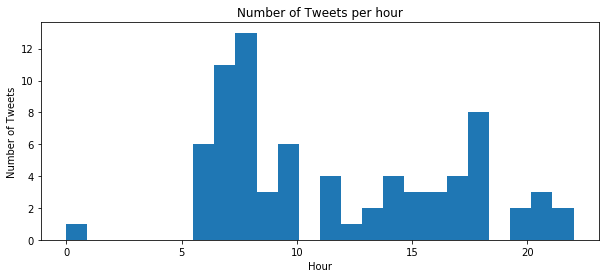

In [13]:
# Barchart of timestamps
Hours = list(map(lambda x: x.hour, df_new.Time))
fig = plt.figure(figsize=(10, 4))
plt.hist(Hours,bins=24);
plt.xlabel('Hour');
plt.ylabel('Number of Tweets');
plt.title('Number of Tweets per hour');

The bar chart below shows the number of likes Trumps Tweets got over the 12 day periode. He got the most likes on the eighth of February.

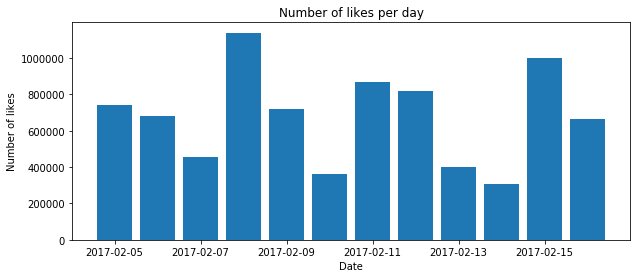

In [15]:
fig = plt.figure(figsize=(10, 4))
plt.bar(sorted(df_new.Date.unique()),df_new.groupby([df_new.Date]).of_favorites.sum().values, align='center');
plt.ylabel('Number of likes');
plt.xlabel('Date');
plt.title('Number of likes per day');

The bar chart below shows the number of retweets Trumps Tweets got over the 12 day periode. He got the most retweets on the fifteenth of February.

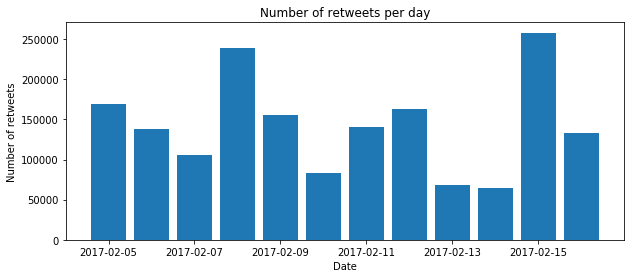

In [16]:
fig = plt.figure(figsize=(10, 4))
plt.bar(sorted(df_new.Date.unique()),df_new.groupby([df_new.Date]).of_retweets.sum().values, align='center');
plt.ylabel('Number of retweets');
plt.xlabel('Date');
plt.title('Number of retweets per day');

# 3. Data analysis <a id="3"></a>

## 3.a Describe your data analysis and explain what you've learned about the dataset. <a id="3a"></a>

The second dataset unfortunately did not have enough geo-location data, otherwise we would have looked for geographical patterns depending on tweet's locations, whether some particular states tweeted more than others (on average) and somehow followed more Trump's news feed.  One of the most challeging parts is  the keyword extracting to capture the topic of the tweets to get a general idea of the subjects tackled by such a president on his first days. Another issue was that the topics tackled by people in their tweets (the second dataset) were so diverse, it was almost impossible to cluster them into categories

## 3.b If relevant, talk about your machine-learning. <a id="3b"></a>

In order to give the user an overview of the Tweets without reading all of the tweets, a number of key words are extracted from the tweets text. The method are based on NLP techniques (natural language processing), which is a field in machine learning that aims to give a computer the ability to understand, analyze and eventually generate human language. The goal in this project is to extract the main keywords of a tweet, to have a general idea of its content as well as the adjectives that reflect its sentiment polarity. 


### Wordcloud of keywords:

In the following word cloud images are made based on the extracted keywords.

<b> OBS! </b> To run this you need to install the wordcloud packages from: https://github.com/amueller/word_cloud

/Users/mac/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/mac/anaconda/lib/python3.6/site-packages/wordcloud/wordcloud.py:733: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


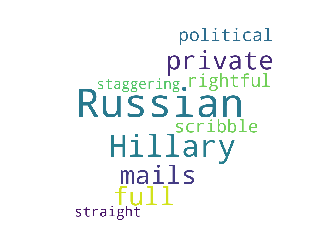

In [17]:
from wordcloud import WordCloud, STOPWORDS
# Get data from GitHub: 
for j in range(11):
    df = pd.read_csv('https://raw.githubusercontent.com/YasminaKerkeb/Sentiment_Distrib/master/Keyword_%d'%j+'.csv')
    df.head()
    # join tweets to a single string
    words = ' '.join(df['Keywords'])
    twitter_mask = imread('./twitter_mask.png', flatten=True)
    # remove URLs, RTs, and twitter handles
    no_urls_no_tags = " ".join([word for word in words.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and word != 'RT'
                                ])

    wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          width=1800,
                          background_color='white',
                          height=1400,
                          mask=twitter_mask
                         ).generate(no_urls_no_tags)

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig('./my_twitter_wordcloud_%d'%j+'.png', dpi=300)
plt.show()

# 4. Genre. Which genre of data story did you use? <a id="4"></a>

## 4.a Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why? <a id="4a"></a>

* **Slideshow:** We are displaying a group of interacting explorable data such as number of tweets, retweets, likes, tweet text and sentiment ration within the whole period ore within a day. The user can choose to explore for a certain day, by picking a day from the timeline bar. If a day has been picked the user can explore the individual Tweets by clicking a time bar in the bar chart, a new screen/slide will then be provided so that the user can explore more and more. 

* **Annotated chart:** The charts are annotated with text and arrow to help guide the user. The annotation will change as the user explores the visualization. Hover effects are added to provide the user with additional information on request. We are also displaying tweets texts, that will appear if the user pick a bar in a bar chart. Example picking a bar in “Number of retweets” bar chart in the visualisation, will show the full Tweet text made at that time.

* **Partitioned Poster:** We are displaying charts which are interacting with each other so that the user can explore the data. The user can choose to explore the data of the full periode or focus on a single day or Tweet. 

* **Navigation Buttons:** The navigation buttons will enhance to display different visualisations between a heatmap and a 3d surface which are showing Trump’s twitters activity. Picking a day data on the main timeline bar will also make changes in the heat map, i.e, it will show a heat map for a specific day.


## 4.b Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why? <a id="4b"></a>

* **Hover highlighting/Detail:**  Hover effect are added to let the user understand what to click on the charts to begin exploring the data. Furthermore the clickable item of the visualization will lead to additional detailed information.

* **Caption/Headlines:**  Headline are added to be able to see more clearly what the user can do with the visualization.

* **Random access (Ordering):**  There is no specific sequence for which the user should explore the visualization. Tweet texts and key words are shown as the user clicks or hover the visualization. In that way the user is being narrated just by clicking some part in the charts. The date picker can be click in whatever order the user wishes. Information about the keyword of the Tweets will appear just by hovering over a date.

* **Selection (Interactivity):** Interactivity in implemented to make the visualization more fun to explore. All visualization are connect and will react to each other.  To show the topics of the day tweets. The user can mousing on the day bar and the topics are pop up for each day and mousing on sentiment histogram also show data. 

* **Annotation (Messaging):**  Added to guide the user and to show the tweet texts.

* **Multi-messaging (Messaging):** To be able to show many feature data at the same time. By clicking or mousing in the chart, some relating data will be narrated. 

* **Introductory Text (Messaging):** To show the whole data visualisation more clearly by introducing the user which data is being visualised and why.  


# 5. Visualizations. <a id="5"></a>

## 5.a Explain the visualizations you've chosen. <a id="5a"></a>

* ***Bar Chart :***  
    * *Hour of Day slide bar chart :* We are visualising the number of tweets about Trump by himself in percentage   in hour based for a day of range 0 to 24. 
        
    * *hour slide bar chart :*  A mutual bar chart is chosen to show the number of likes and the number of retweets for each tweets by others. This bar chart has a random range of hours in a day changing for different tweets.  By clicking the bar element in the this chart, the tweet text will be appeared.
    
* ***Picker Bar : ***  
    * *A picker bar : *  timeline bar is chosen to show all the 12 days of the period. Mousing on these days on the timeline bar, the popular topics about the election or about US or about Trump, will provide immediately. By clicking the specific day button in the day timeline bar, it will let the user to explore a bunch of information which also relating the other two bar charts above. 
    
* ***Histogram :***  A histogram seemed the most suitable chart to display the sentiment distribution. Mousing on the bars, we are able to see the frequency of each value of the sentiment rate.

* ***Doughnut chart :***  the goal of the doughnut chart is to show the relative frequency of each sentiment polarity, rounded to 2 digits. This type of visualization was chosen because readers can see a data comparison at a glance, enabling them to make an immediate analysis. 

* ***Word Cloud :***  A word cloud is chosen to display the most common adjectives in the tweets about Trump. It is an attractive and engaging type of visualization to get a little insight in the sentiment polarity denoted by the adjectives and the style of writing.

* ***Text Display :***  We choose to display tweets texts by Trump himself. There are also some more text displaying in other chart. Mousing on heat map, it will display some text informations like date, day period and tweet counts.

* ***Heat map :***  A heat map is chosen to show Trump’s twitter activity in a specific period(12 days). We simply show the activity in four different period of time such as night, morning, afternoon, and evening. The heat map can show when he is most  active in the day.

* ***Geo map :***  We choose also a geo map to show the locations of the twitter users who tweet about Trump. This visualisation has few geo location data, but we eventually show in a way that it is explorable as a part of the whole visualisations. 


## 5.b Why are they right for the story you want to tell? <a id="5b"></a>

We wanted to allow the user on one hand to investigate the popularity of the subjects tackled by Trump throughout his first 12 days  of presidency by analyzing the likes and retweets on the histograms that interact with the timeline. We can for example get  the topics on which Trump’s tweet got the most likes and thus got more popular, Security matters and Russia for instance. On the other hand, the aim was to analyze how Trump’s Twitter activity echoed on his popularity by displaying the sentiment rate distribution of people’s tweets reacting on Trump’s activity, as well as the relative frequency of the polarity and finally the most commonly used words in those tweets.  For example,  the sentiment rate histogram shows that most of the tweets are neutral or slightly of positive or negative character with a few peaks on the negative side, probably reacting to particular topics. The doughnut chart and word cloud can also reflect in a way Trump’s popularity by reflecting the public opinion’s polarity and the words he is most associated to. The heat map is also here to detail in time Trump’s Twitter activity and extract time patterns for Donald Trump’s tweets and people’s reactions to them.



# 6. Discussion. Think critically about your creation <a id="6"></a>

## 6.a What went well? <a id="6a"></a>

* The visualisations are explorable,  interactive,  detailed-on-demand, and follow a martini glass structure of narrating  social media like twitter affecting Trump’s popularity and his twitter activity.

* We were able to create many type of visualizations starting from histograms to heatmaps and word clouds.

* We created navigation buttons in observable notebook allowed to save some space instead of going for a linear display of visualizations. It took a certain time for finding the suitable way for this creation.




## 6.b What is still missing? What could be improved? Why? <a id="6b"></a>


* The chosen period is a rather small one, it would have been better to have a bigger period to capture more patterns in the data, sadly we were not able to find more data.

* The geo location visualisation present small data, not very representative.

* The keyword extraction for the tweet’s topics and adjectives is still basic, we could have used more advanced techniques to get more relevant results.


# 7. Contributions. Who did what? <a id="7"></a>

<b> You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).
It is not OK simply to write "All group members contributed equally". </b>

* Preprocessing of Sentiment data (Yasmina)
* Preprocessing of Trump Tweets (Luna)
* Preprocessing for Heatmaps (Esther)
* Preprocessing + keyword extraction for wordclouds (Yasmina)
* Observable heatmap (Esther)
* Observable Trump plots (Luna)
* Observable histogram/donut (Yasmina)
* iPython layout (Luna)
* iPython Motivation + stats (Yasmina + Esther)
* iPython Analysis (Luna)
* iPython Genre + Visualization (Esther)
* iPython Discussion (Yasmina)


# References: <a id="8"></a>

Dataset with Tweets with Keyword Trump: https://data.world/s0nas/donal-trump-tweets-sentiment

Dataset with Tweets from Trump personal account: https://data.world/sbjun/trumps-post-inaug-tweets

Package to generate the word cloud: https://github.com/amueller/word_cloud

Narrative Visualization: Telling Stories with Data, Edward Segel and Jeffrey Heer